In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mflex.simulate.simulate_boundary import dipole
from mflex.plot.plot_magnetogram import plot_fieldlines_polar_paper
from mflex.evaluate.metrics import (
    vec_corr_metric,
    vec_corr_metric2,
    cau_Schw_metric,
    cau_Schw_metric2,
    norm_vec_err_metric,
    norm_vec_err_metric2,
    mean_vec_err_metric,
    mean_vec_err_metric2,
    mag_ener_metric,
    mag_ener_metric2,
    field_div_metric,
    pearson_corr_coeff_comp,
)
from mflex.model.plasma_parameters import (
    bpressure,
    bdensity,
    btemp,
    deltapres,
    deltaden,
    pres,
    den,
    btemp,
)
from mflex.model.field.save import save_field
from mflex.model.field.bfield_model import (
    magnetic_field,
    magnetic_field_hypergeo,
)

In [3]:
xmin = 0.0
ymin = 0.0
zmin = 0.0
xmax = 2.0
ymax = 2.0
zmax = 2.0

nresol_x = 200
nresol_y = 200
nresol_z = 300
nf_max = 200

pixelsize_x = (xmax - xmin) / nresol_x
pixelsize_y = (ymax - ymin) / nresol_y
pixelsize_z = (zmax - zmin) / nresol_z

z0 = 0.2
deltaz = 0.02
b = 1.0

z0_b = z0
deltaz_b = deltaz

length_scale = 1.0
length_scale_x = 1.0 * nresol_x * float(pixelsize_x)
length_scale_y = 1.0 * nresol_y * float(pixelsize_y)
length_scale_x_norm = length_scale_x / length_scale
length_scale_y_norm = length_scale_y / length_scale

x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin

cmap = LinearSegmentedColormap.from_list( "", ["dimgray", "whitesmoke"])

h1 = 0.01  # Initial step length for fieldline3D
eps = 1.0e-8
# Tolerance to which we require point on field line known for fieldline3D
hmin = 0.0  # Minimum step length for fieldline3D
hmax = 1.0  # Maximum step length for fieldline3D

In [4]:
data_bz = np.zeros((nresol_y, nresol_x))

x_plot = np.outer(y_arr, np.ones(nresol_x))
y_plot = np.outer(x_arr, np.ones(nresol_y)).T

for ix, x in enumerate(x_arr):
    for iy, y in enumerate(y_arr):
        data_bz[iy, ix] = dipole(x, y)

# fig = plt.figure()
# ax = fig.add_subplot(projection="3d")
# ax.plot_surface(y_plot, x_plot, data_bz, cmap=cmap)
# ax.set_xlabel("x")
# ax.set_ylabel("y")
# ax.set_zlabel("z")
# ax.view_init(30, -115, 0)
# ax.grid(False)
# plotname = "/Users/lilli/Desktop/Paper/aBC1.png"
# plt.savefig(plotname, dpi=300)
# plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(projection="3d")
# cs = ax.plot_surface(y_plot, x_plot, data_bz, cmap=cmap, antialiased=False)
# ax.set_xlabel("x")
# ax.set_ylabel("y")
# ax.view_init(90, -90, 0)
# ax.grid(False)
# ax.set_zticks([])
# fig.colorbar(cs, shrink=0.5)
# plotname = "/Users/lilli/Desktop/Paper/aBC2.png"
# plt.savefig(plotname, dpi=300)
# plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(projection="3d")
# cs = ax.plot_surface(y_plot, x_plot, data_bz, cmap=cmap, antialiased=False)
# ax.set_xlabel("x")
# ax.set_zlabel("z")
# ax.view_init(0, -90, 0)
# ax.grid(False)
# ax.set_yticks([])
# fig.colorbar(cs, shrink=0.5)
# plotname = "/Users/lilli/Desktop/Paper/aBC3.png"
# plt.savefig(plotname, dpi=300)
# plt.show()

In [5]:
# a = 0.0
# alpha = 0.0

# mfield_hyp_potential, dmfield_hyp_potential = magnetic_field_hypergeo(
#     data_bz,
#     z0_b,
#     deltaz_b,
#     a,
#     b,
#     alpha,
#     xmin,
#     xmax,
#     ymin,
#     ymax,
#     zmin,
#     zmax,
#     nresol_x,
#     nresol_y,
#     nresol_z,
#     pixelsize_x,
#     pixelsize_y,
#     nf_max,
#     length_scale,
# )
# mfield_asymp_potential, dmfield_asymp_potential = magnetic_field(
#     data_bz,
#     z0_b,
#     deltaz_b,
#     a,
#     b,
#     alpha,
#     xmin,
#     xmax,
#     ymin,
#     ymax,
#     zmin,
#     zmax,
#     nresol_x,
#     nresol_y,
#     nresol_z,
#     pixelsize_x,
#     pixelsize_y,
#     nf_max,
#     length_scale,
# )

# save_field(mfield_hyp_potential, dmfield_hyp_potential, "aBC_hypgeo_test_" + str(a) + "_" + str(alpha) + "_" + str(b))
# save_field(mfield_asymp_potential, dmfield_asymp_potential, "aBC_asymp_test_" + str(a) + "_" + str(alpha) + "_" + str(b))

In [6]:
# a = 0.0
# alpha = 0.25

# mfield_hyp_lff, dmfield_hyp_lff = magnetic_field_hypergeo(
#     data_bz,
#     z0_b,
#     deltaz_b,
#     a,
#     b,
#     alpha,
#     xmin,
#     xmax,
#     ymin,
#     ymax,
#     zmin,
#     zmax,
#     nresol_x,
#     nresol_y,
#     nresol_z,
#     pixelsize_x,
#     pixelsize_y,
#     nf_max,
#     length_scale,
# )
# mfield_asymp_lff, dmfield_asymp_lff = magnetic_field(
#     data_bz,
#     z0_b,
#     deltaz_b,
#     a,
#     b,
#     alpha,
#     xmin,
#     xmax,
#     ymin,
#     ymax,
#     zmin,
#     zmax,
#     nresol_x,
#     nresol_y,
#     nresol_z,
#     pixelsize_x,
#     pixelsize_y,
#     nf_max,
#     length_scale,
# )

# save_field(mfield_hyp_lff, dmfield_hyp_lff, "aBC_hypgeo_test_" + str(a) + "_" + str(alpha) + "_" + str(b))
# save_field(mfield_asymp_lff, dmfield_asymp_lff, "aBC_asymp_test_" + str(a) + "_" + str(alpha) + "_" + str(b))

In [7]:
# a = 0.22
# alpha = 0.25

# mfield_hyp_mhs1, dmfield_hyp_mhs1 = magnetic_field_hypergeo(
#     data_bz,
#     z0_b,
#     deltaz_b,
#     a,
#     b,
#     alpha,
#     xmin,
#     xmax,
#     ymin,
#     ymax,
#     zmin,
#     zmax,
#     nresol_x,
#     nresol_y,
#     nresol_z,
#     pixelsize_x,
#     pixelsize_y,
#     nf_max,
#     length_scale,
# )
# mfield_asymp_mhs1, dmfield_asymp_mhs1 = magnetic_field(
#     data_bz,
#     z0_b,
#     deltaz_b,
#     a,
#     b,
#     alpha,
#     xmin,
#     xmax,
#     ymin,
#     ymax,
#     zmin,
#     zmax,
#     nresol_x,
#     nresol_y,
#     nresol_z,
#     pixelsize_x,
#     pixelsize_y,
#     nf_max,
#     length_scale,
# )

# save_field(mfield_hyp_mhs1, dmfield_hyp_mhs1, "aBC_hypgeo_test_" + str(a) + "_" + str(alpha) + "_" + str(b))
# save_field(mfield_asymp_mhs1, dmfield_asymp_mhs1, "aBC_asymp_test_" + str(a) + "_" + str(alpha) + "_" + str(b))

In [8]:
# a = 0.44
# alpha = 0.25

# mfield_hyp_mhs2, dmfield_hyp_mhs2 = magnetic_field_hypergeo(
#     data_bz,
#     z0_b,
#     deltaz_b,
#     a,
#     b,
#     alpha,
#     xmin,
#     xmax,
#     ymin,
#     ymax,
#     zmin,
#     zmax,
#     nresol_x,
#     nresol_y,
#     nresol_z,
#     pixelsize_x,
#     pixelsize_y,
#     nf_max,
#     length_scale,
# )
# mfield_asymp_mhs2, dmfield_asymp_mhs2 = magnetic_field(
#     data_bz,
#     z0_b,
#     deltaz_b,
#     a,
#     b,
#     alpha,
#     xmin,
#     xmax,
#     ymin,
#     ymax,
#     zmin,
#     zmax,
#     nresol_x,
#     nresol_y,
#     nresol_z,
#     pixelsize_x,
#     pixelsize_y,
#     nf_max,
#     length_scale,
# )

# save_field(mfield_hyp_mhs2, dmfield_hyp_mhs2, "aBC_hypgeo_test_" + str(a) + "_" + str(alpha) + "_" + str(b))
# save_field(mfield_asymp_mhs2, dmfield_asymp_mhs2, "aBC_asymp_test_" + str(a) + "_" + str(alpha) + "_" + str(b))



In [9]:
a_potential = 0.0
alpha_potential = 0.0

mfield_asymp_potential = np.load(f"/Users/lilli/Desktop/Paper/aBC_asymp_test_{a_potential}_{alpha_potential}_{b}_bfield3d.npy")
dmfield_asymp_potential = np.load(f"/Users/lilli/Desktop/Paper/aBC_asymp_test_{a_potential}_{alpha_potential}_{b}_dbzdxdydz3d.npy")

a_lff = 0.0
alpha_lff = 0.25

mfield_asymp_lff = np.load(f"/Users/lilli/Desktop/Paper/aBC_asymp_test_{a_lff}_{alpha_lff}_{b}_bfield3d.npy")
dmfield_asymp_lff = np.load(f"/Users/lilli/Desktop/Paper/aBC_asymp_test_{a_lff}_{alpha_lff}_{b}_dbzdxdydz3d.npy")

a_mhs1 = 0.22
alpha_mhs1 = 0.25

mfield_asymp_mhs1 = np.load(f"/Users/lilli/Desktop/Paper/aBC_asymp_test_{a_mhs1}_{alpha_mhs1}_{b}_bfield3d.npy")
dmfield_asymp_mhs1 = np.load(f"/Users/lilli/Desktop/Paper/aBC_asymp_test_{a_mhs1}_{alpha_mhs1}_{b}_dbzdxdydz3d.npy")

a_mhs2 = 0.44
alpha_mhs2 = 0.25

mfield_asymp_mhs2 = np.load(f"/Users/lilli/Desktop/Paper/aBC_asymp_test_{a_mhs2}_{alpha_mhs2}_{b}_bfield3d.npy")
dmfield_asymp_mhs2 = np.load(f"/Users/lilli/Desktop/Paper/aBC_asymp_test_{a_mhs2}_{alpha_mhs2}_{b}_dbzdxdydz3d.npy")

In [10]:


mfield_hyp_potential = np.load(f"/Users/lilli/Desktop/Paper/aBC_hypgeo_test_{a_potential}_{alpha_potential}_{b}_bfield3d.npy")
dmfield_hyp_potential = np.load(f"/Users/lilli/Desktop/Paper/aBC_hypgeo_test_{a_potential}_{alpha_potential}_{b}_dbzdxdydz3d.npy")


mfield_hyp_lff = np.load(f"/Users/lilli/Desktop/Paper/aBC_hypgeo_test_{a_lff}_{alpha_lff}_{b}_bfield3d.npy")
dmfield_hyp_lff = np.load(f"/Users/lilli/Desktop/Paper/aBC_hypgeo_test_{a_lff}_{alpha_lff}_{b}_dbzdxdydz3d.npy")


mfield_hyp_mhs1 = np.load(f"/Users/lilli/Desktop/Paper/aBC_hypgeo_test_{a_mhs1}_{alpha_mhs1}_{b}_bfield3d.npy")
dmfield_hyp_mhs1 = np.load(f"/Users/lilli/Desktop/Paper/aBC_hypgeo_test_{a_mhs1}_{alpha_mhs1}_{b}_dbzdxdydz3d.npy")


mfield_hyp_mhs2 = np.load(f"/Users/lilli/Desktop/Paper/aBC_hypgeo_test_{a_mhs2}_{alpha_mhs2}_{b}_bfield3d.npy")
dmfield_hyp_mhs2 = np.load(f"/Users/lilli/Desktop/Paper/aBC_hypgeo_test_{a_mhs2}_{alpha_mhs2}_{b}_dbzdxdydz3d.npy")


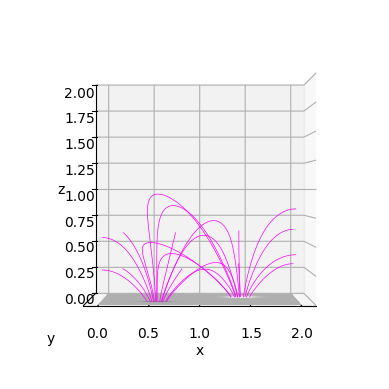

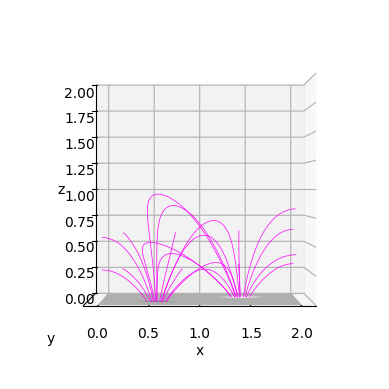

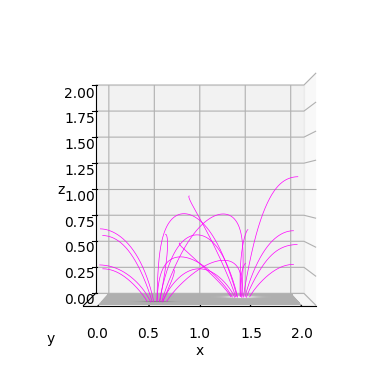

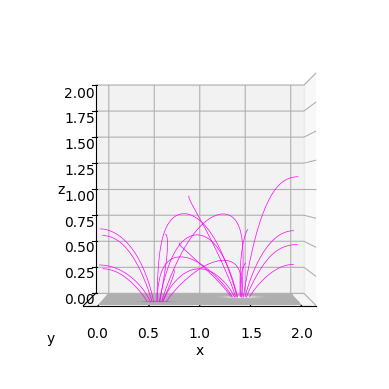

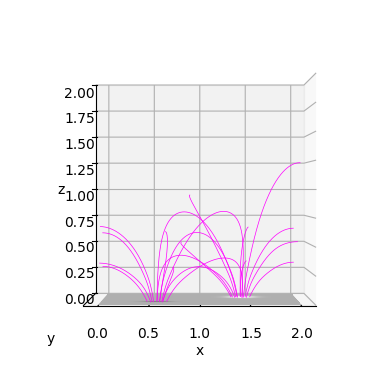

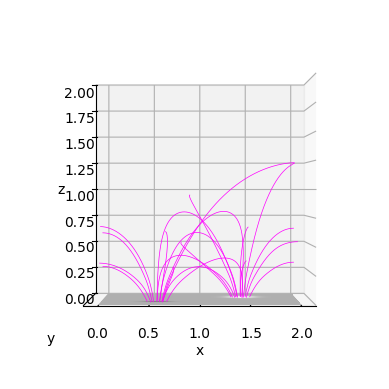

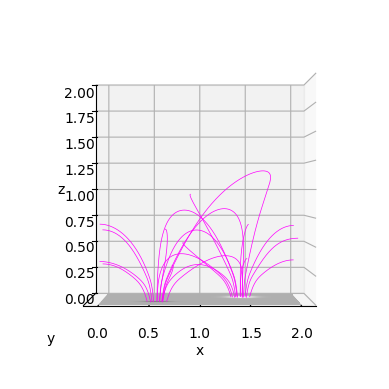

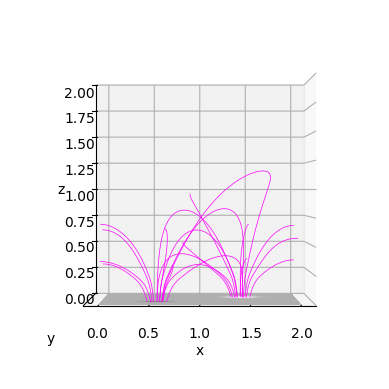

In [11]:
plot_fieldlines_polar_paper(
    mfield_hyp_potential,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a_potential,
    b,
    alpha_potential,
    nf_max,
    name="MF_hyp",
    cmap=cmap,
)

plot_fieldlines_polar_paper(
    mfield_asymp_potential,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a_potential,
    b,
    alpha_potential,
    nf_max,
    name="MF_asymp",
    cmap=cmap,
)

plot_fieldlines_polar_paper(
    mfield_hyp_lff,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a_lff,
    b,
    alpha_lff,
    nf_max,
    name="MF_hyp",
    cmap=cmap,
)

plot_fieldlines_polar_paper(
    mfield_asymp_lff,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a_lff,
    b,
    alpha_lff,
    nf_max,
    name="MF_asymp",
    cmap=cmap,
)

plot_fieldlines_polar_paper(
    mfield_hyp_mhs1,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a_mhs1,
    b,
    alpha_mhs1,
    nf_max,
    name="MF_hyp",
    cmap=cmap,
)

plot_fieldlines_polar_paper(
    mfield_asymp_mhs1,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a_mhs1,
    b,
    alpha_mhs1,
    nf_max,
    name="MF_asymp",
    cmap=cmap,
)

plot_fieldlines_polar_paper(
    mfield_hyp_mhs2,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a_mhs2,
    b,
    alpha_mhs2,
    nf_max,
    name="MF_hyp",
    cmap=cmap,
)

plot_fieldlines_polar_paper(
    mfield_asymp_mhs2,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a_mhs2,
    b,
    alpha_mhs2,
    nf_max,
    name="MF_asymp",
    cmap=cmap,
)

In [12]:
print(np.unravel_index(data_bz.argmax(), data_bz.shape))
ix_max = np.unravel_index(data_bz.argmax(), data_bz.shape)[1]
iy_max = np.unravel_index(data_bz.argmax(), data_bz.shape)[0]
print(np.unravel_index(mfield_asymp_mhs1.argmax(), mfield_asymp_mhs1.shape))

(143, 143)
(56, 56, 0, 2)


In [13]:
# dpres_hyp_mhs2 = np.zeros((nresol_y, nresol_x, nresol_z))
# dpres_asymp_mhs2 = np.zeros((nresol_y, nresol_x, nresol_z))

# dden_hyp_mhs2 = np.zeros((nresol_y, nresol_x, nresol_z))
# dden_asymp_mhs2 = np.zeros((nresol_y, nresol_x, nresol_z))

# dpres_hyp_mhs1 = np.zeros((nresol_y, nresol_x, nresol_z))
# dpres_asymp_mhs1 = np.zeros((nresol_y, nresol_x, nresol_z))

# dden_hyp_mhs1 = np.zeros((nresol_y, nresol_x, nresol_z))
# dden_asymp_mhs1 = np.zeros((nresol_y, nresol_x, nresol_z))

# dpres_asymp_lff = np.zeros((nresol_y, nresol_x, nresol_z))

# dden_asymp_lff = np.zeros((nresol_y, nresol_x, nresol_z))

# dpres_asymp_potential = np.zeros((nresol_y, nresol_x, nresol_z))

# dden_asymp_potential = np.zeros((nresol_y, nresol_x, nresol_z))

# for ix in range(nresol_x):
#     for iy in range(nresol_y):
#         for iz in range(nresol_z):
#             z = z_arr[iz]
#             bz_hyp_mhs2 = mfield_hyp_mhs2[nresol_y + iy, nresol_x + ix, iz, 2]
#             bz_asymp_mhs2 = mfield_asymp_mhs2[nresol_y + iy, nresol_x + ix, iz, 2]

#             dbz_hyp_mhs2 = (
#                 dmfield_hyp_mhs2[nresol_y + iy, nresol_x + ix, iz, 1]
#                 * mfield_hyp_mhs2[nresol_y + iy, nresol_x + ix, iz, 1]
#                 + dmfield_hyp_mhs2[nresol_y + iy, nresol_x + ix, iz, 0]
#                 * mfield_hyp_mhs2[nresol_y + iy, nresol_x + ix, iz, 0]
#                 + dmfield_hyp_mhs2[nresol_y + iy, nresol_x + ix, iz, 2]
#                 * mfield_hyp_mhs2[nresol_y + iy, nresol_x + ix, iz, 2]
#             )
#             dbz_asymp_mhs2 = (
#                 dmfield_asymp_mhs2[nresol_y + iy, nresol_x + ix, iz, 1]
#                 * mfield_asymp_mhs2[nresol_y + iy, nresol_x + ix, iz, 1]
#                 + dmfield_asymp_mhs2[nresol_y + iy, nresol_x + ix, iz, 0]
#                 * mfield_asymp_mhs2[nresol_y + iy, nresol_x + ix, iz, 0]
#                 + dmfield_asymp_mhs2[nresol_y + iy, nresol_x + ix, iz, 2]
#                 * mfield_asymp_mhs2[nresol_y + iy, nresol_x + ix, iz, 2]
#             )
#             dpres_hyp_mhs2[iy, ix, iz] = deltapres(z, z0_b, deltaz_b, a_mhs2, b, bz_hyp_mhs2)
#             dpres_asymp_mhs2[iy, ix, iz] = deltapres(z, z0_b, deltaz_b, a_mhs2, b, bz_asymp_mhs2)

#             dden_hyp_mhs2[iy, ix, iz] = deltaden(
#                 z, z0_b, deltaz_b, a_mhs2, b, bz_hyp_mhs2, dbz_hyp_mhs2
#             )
#             dden_asymp_mhs2[iy, ix, iz] = deltaden(
#                 z, z0_b, deltaz_b, a_mhs2, b, bz_asymp_mhs2, dbz_asymp_mhs2
#             )

#             bz_asymp_potential = mfield_asymp_potential[nresol_y + iy, nresol_x + ix, iz, 2]
            
#             dbz_asymp_potential = (
#                 dmfield_asymp_potential[nresol_y + iy, nresol_x + ix, iz, 1]
#                 * mfield_asymp_potential[nresol_y + iy, nresol_x + ix, iz, 1]
#                 + dmfield_asymp_potential[nresol_y + iy, nresol_x + ix, iz, 0]
#                 * mfield_asymp_potential[nresol_y + iy, nresol_x + ix, iz, 0]
#                 + dmfield_asymp_potential[nresol_y + iy, nresol_x + ix, iz, 2]
#                 * mfield_asymp_potential[nresol_y + iy, nresol_x + ix, iz, 2]
#             )
            
#             dpres_asymp_potential[iy, ix, iz] = deltapres(z, z0_b, deltaz_b, a_potential, b, bz_asymp_potential)
        
#             dden_asymp_potential[iy, ix, iz] = deltaden(
#                 z, z0_b, deltaz_b, a_potential, b, bz_asymp_potential, dbz_asymp_potential
#             )

#             bz_asymp_lff = mfield_asymp_lff[nresol_y + iy, nresol_x + ix, iz, 2]
            
#             dbz_asymp_lff = (
#                 dmfield_asymp_lff[nresol_y + iy, nresol_x + ix, iz, 1]
#                 * mfield_asymp_lff[nresol_y + iy, nresol_x + ix, iz, 1]
#                 + dmfield_asymp_lff[nresol_y + iy, nresol_x + ix, iz, 0]
#                 * mfield_asymp_lff[nresol_y + iy, nresol_x + ix, iz, 0]
#                 + dmfield_asymp_lff[nresol_y + iy, nresol_x + ix, iz, 2]
#                 * mfield_asymp_lff[nresol_y + iy, nresol_x + ix, iz, 2]
#             )
            
#             dpres_asymp_lff[iy, ix, iz] = deltapres(z, z0_b, deltaz_b, a_lff, b, bz_asymp_lff)
        
#             dden_asymp_lff[iy, ix, iz] = deltaden(
#                 z, z0_b, deltaz_b, a_lff, b, bz_asymp_lff, dbz_asymp_lff
#             )

#             bz_hyp_mhs1 = mfield_hyp_mhs1[nresol_y + iy, nresol_x + ix, iz, 2]
#             bz_asymp_mhs1 = mfield_asymp_mhs1[nresol_y + iy, nresol_x + ix, iz, 2]

#             dbz_hyp_mhs1 = (
#                 dmfield_hyp_mhs1[nresol_y + iy, nresol_x + ix, iz, 1]
#                 * mfield_hyp_mhs1[nresol_y + iy, nresol_x + ix, iz, 1]
#                 + dmfield_hyp_mhs1[nresol_y + iy, nresol_x + ix, iz, 0]
#                 * mfield_hyp_mhs1[nresol_y + iy, nresol_x + ix, iz, 0]
#                 + dmfield_hyp_mhs1[nresol_y + iy, nresol_x + ix, iz, 2]
#                 * mfield_hyp_mhs1[nresol_y + iy, nresol_x + ix, iz, 2]
#             )
#             dbz_asymp_mhs1 = (
#                 dmfield_asymp_mhs1[nresol_y + iy, nresol_x + ix, iz, 1]
#                 * mfield_asymp_mhs1[nresol_y + iy, nresol_x + ix, iz, 1]
#                 + dmfield_asymp_mhs1[nresol_y + iy, nresol_x + ix, iz, 0]
#                 * mfield_asymp_mhs1[nresol_y + iy, nresol_x + ix, iz, 0]
#                 + dmfield_asymp_mhs1[nresol_y + iy, nresol_x + ix, iz, 2]
#                 * mfield_asymp_mhs1[nresol_y + iy, nresol_x + ix, iz, 2]
#             )
#             dpres_hyp_mhs1[iy, ix, iz] = deltapres(z, z0_b, deltaz_b, a_mhs1, b, bz_hyp_mhs1)
#             dpres_asymp_mhs1[iy, ix, iz] = deltapres(z, z0_b, deltaz_b, a_mhs1, b, bz_asymp_mhs1)

#             dden_hyp_mhs1[iy, ix, iz] = deltaden(
#                 z, z0_b, deltaz_b, a_mhs1, b, bz_hyp_mhs1, dbz_hyp_mhs1
#             )
#             dden_asymp_mhs1[iy, ix, iz] = deltaden(
#                 z, z0_b, deltaz_b, a_mhs1, b, bz_asymp_mhs1, dbz_asymp_mhs1
#             )

In [14]:
# np.save("/Users/lilli/Desktop/Paper/dden_hyp_mhs1", dden_hyp_mhs1)
# np.save("/Users/lilli/Desktop/Paper/dden_asymp_mhs1", dden_asymp_mhs1)

# np.save("/Users/lilli/Desktop/Paper/dden_hyp_mhs2", dden_hyp_mhs2)
# np.save("/Users/lilli/Desktop/Paper/dden_asymp_mhs2", dden_asymp_mhs2)

# np.save("/Users/lilli/Desktop/Paper/dpres_hyp_mhs1", dpres_hyp_mhs1)
# np.save("/Users/lilli/Desktop/Paper/dpres_asymp_mhs1", dpres_asymp_mhs1)

# np.save("/Users/lilli/Desktop/Paper/dpres_hyp_mhs2", dpres_hyp_mhs2)
# np.save("/Users/lilli/Desktop/Paper/dpres_asymp_mhs2", dpres_asymp_mhs2)

# np.save("/Users/lilli/Desktop/Paper/dpres_asymp_lff", dpres_asymp_lff)
# np.save("/Users/lilli/Desktop/Paper/dden_asymp_lff", dden_asymp_lff)

# np.save("/Users/lilli/Desktop/Paper/dpres_asymp_potential", dpres_asymp_potential)
# np.save("/Users/lilli/Desktop/Paper/dden_asymp_potential", dden_asymp_potential)

In [15]:
dden_hyp_mhs1 = np.load("/Users/lilli/Desktop/Paper/dden_hyp_mhs1.npy")
dden_asymp_mhs1 = np.load("/Users/lilli/Desktop/Paper/dden_asymp_mhs1.npy")

dden_hyp_mhs2 = np.load("/Users/lilli/Desktop/Paper/dden_hyp_mhs2.npy")
dden_asymp_mhs2 = np.load("/Users/lilli/Desktop/Paper/dden_asymp_mhs2.npy")

dpres_hyp_mhs1 = np.load("/Users/lilli/Desktop/Paper/dpres_hyp_mhs1.npy")
dpres_asymp_mhs1 = np.load("/Users/lilli/Desktop/Paper/dpres_asymp_mhs1.npy")

dpres_hyp_mhs2 = np.load("/Users/lilli/Desktop/Paper/dpres_hyp_mhs2.npy")
dpres_asymp_mhs2 = np.load("/Users/lilli/Desktop/Paper/dpres_asymp_mhs2.npy")

dpres_asymp_lff = np.load("/Users/lilli/Desktop/Paper/dpres_asymp_lff.npy")
dden_asymp_lff = np.load("/Users/lilli/Desktop/Paper/dden_asymp_lff.npy")

dpres_asymp_potential = np.load("/Users/lilli/Desktop/Paper/dpres_asymp_potential.npy")
dden_asymp_potential = np.load("/Users/lilli/Desktop/Paper/dden_asymp_potential.npy")

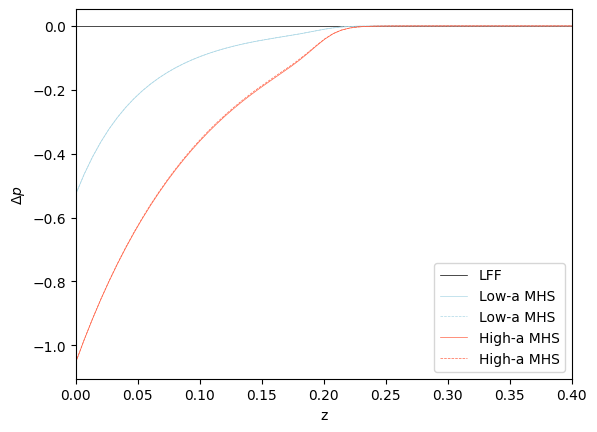

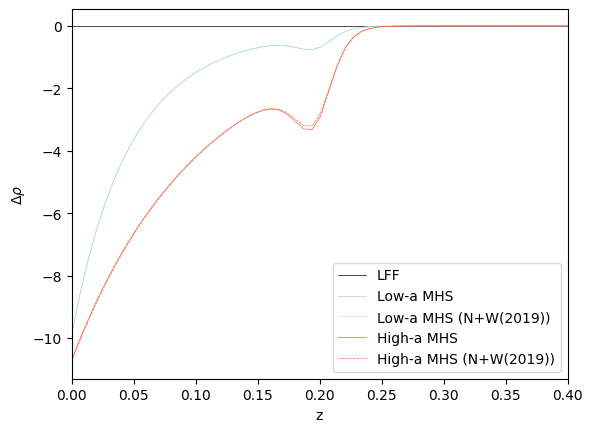

In [16]:
plt.plot(
    z_arr,
    dpres_asymp_lff[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color="black",
    label="LFF",
)
plt.plot(
    z_arr,
    dpres_asymp_mhs1[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color="lightblue",
    label="Low-a MHS",
)
plt.plot(
    z_arr,
    dpres_hyp_mhs1[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="dashed",
    color="lightblue",
    label="Low-a MHS",
)
plt.plot(
    z_arr,
    dpres_asymp_mhs2[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color="tomato",
    label="High-a MHS",
)
plt.plot(
    z_arr,
    dpres_hyp_mhs2[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="dashed",
    color="tomato",
    label="High-a MHS",
)
plt.xlim([0, 2 * z0])
plt.ylabel(r"$\Delta p$")
plt.xlabel("z")
plt.legend()
plotname = "/Users/lilli/Desktop/Paper/dpres_cases.png"
plt.savefig(plotname, dpi=300)
plt.show()

plt.plot(
    z_arr,
    dden_asymp_lff[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color="black",
    label="LFF",
)
plt.plot(
    z_arr,
    dden_asymp_mhs1[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color="lightblue",
    label="Low-a MHS",
)
plt.plot(
    z_arr,
    dden_hyp_mhs1[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="dashed",
    color="lightblue",
    label="Low-a MHS (N+W(2019))",
)
plt.plot(
    z_arr,
    dden_asymp_mhs2[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color="tomato",
    label="High-a MHS",
)
plt.plot(
    z_arr,
    dden_hyp_mhs2[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="dashed",
    color="tomato",
    label="High-a MHS (N+W(2019))",
)
plt.xlim([0, 2 * z0])
plt.ylabel(r"$\Delta \rho$")
plt.xlabel("z")
plt.legend()
plotname = "/Users/lilli/Desktop/Paper/dden_cases.png"
plt.savefig(plotname, dpi=300)
plt.show()